In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd

In [17]:
def plot_returns(env_name, alphas, clips, std_scale=0.1):
    with open(f"{env_name}_offpolicy.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"{env_name}_offpolicy_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(alphas), len(clips))
    print(returns.shape)
    
    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"clip={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)

        plt.figure(figsize=(10, 7))
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        # ax.yaxis.set_major_locator(plticker.MultipleLocator(base=25.0))
        plt.title(f"Off-policy alpha={alphas[j]}")
        plt.show()
    
    return returns

## 1. Acrobot

Doesn't learn anything: return stays at -500.

## 2. Asterix

Doesn't learn anything.

(8, 4, 6, 32)


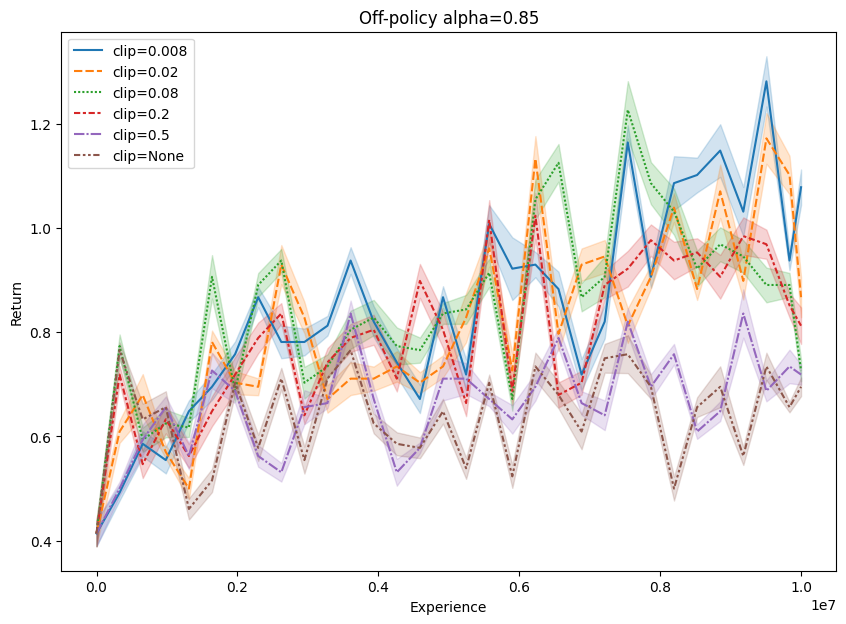

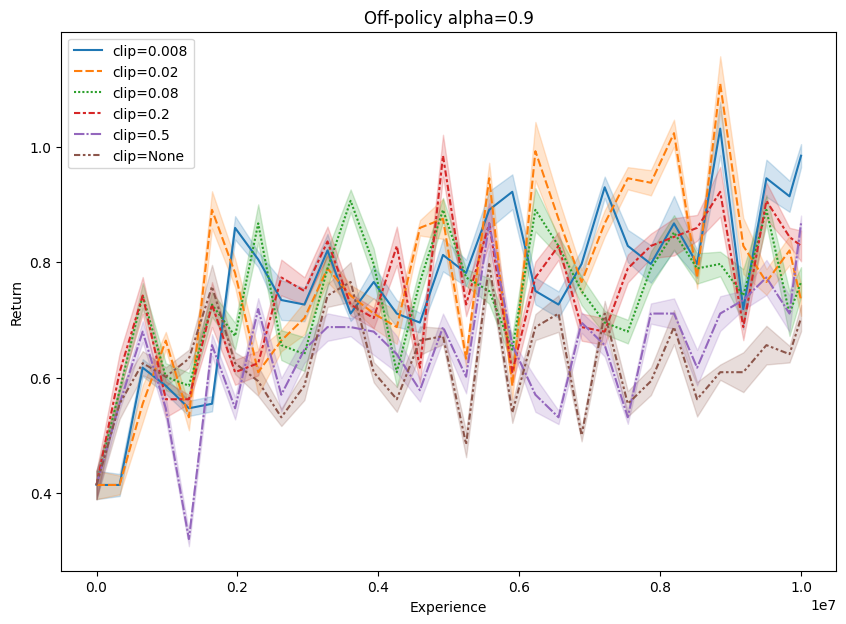

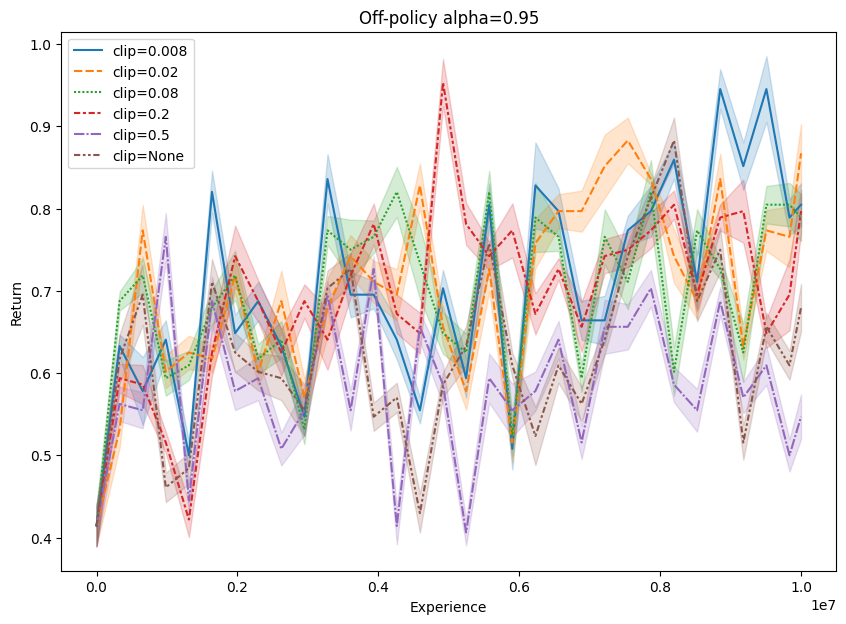

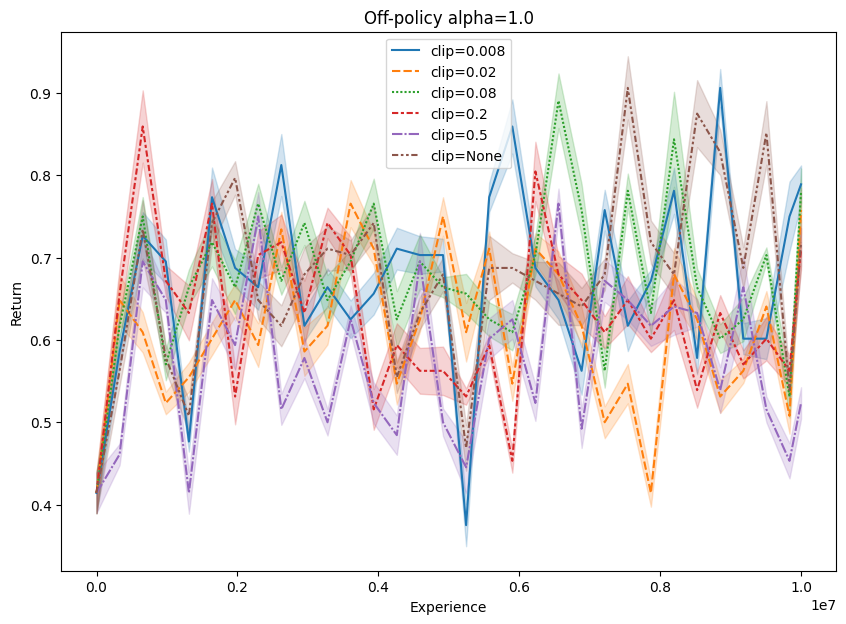

In [19]:
alphas = [0.85, 0.9, 0.95, 1.0]
clips = [0.008, 0.02, 0.08, 0.2, 0.5, 1e6]

returns = plot_returns("Asterix-MinAtar", alphas, clips)

In [20]:
returns[0, 0, 0, :]

array([0.4375, 0.4375, 0.6875, 0.4375, 1.    , 1.1875, 0.875 , 0.8125,
       0.875 , 0.8125, 0.625 , 0.75  , 0.875 , 0.3125, 0.3125, 0.875 ,
       1.25  , 1.0625, 0.5625, 1.    , 0.875 , 0.5   , 0.5625, 1.5625,
       0.9375, 0.8125, 1.4375, 1.875 , 0.3125, 0.8125, 1.125 , 0.9375],
      dtype=float32)

## 3. Breakout

(8, 3, 6, 32)


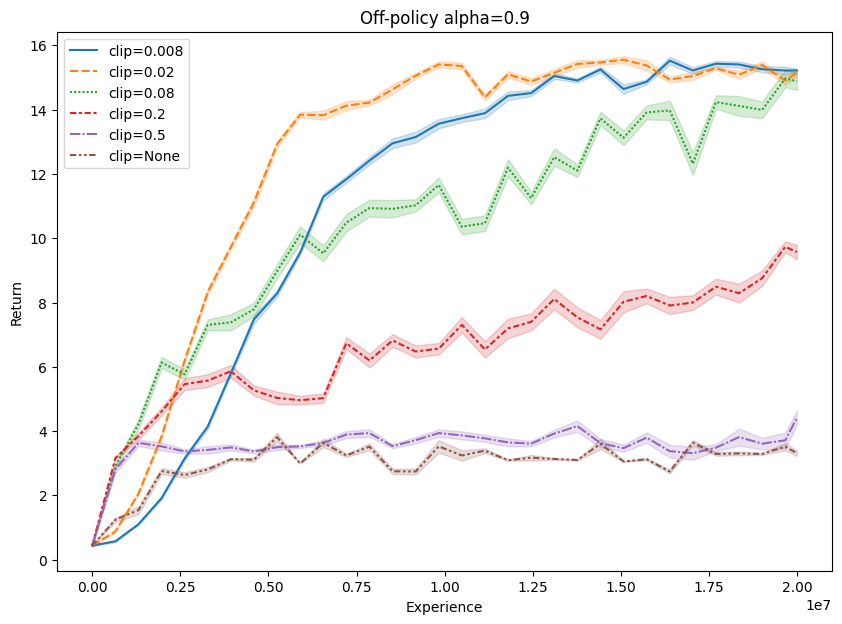

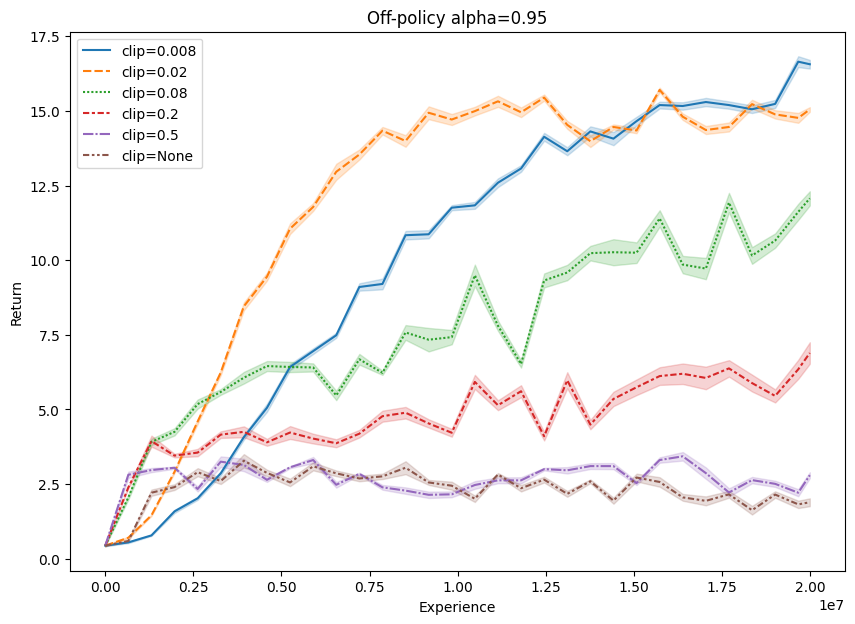

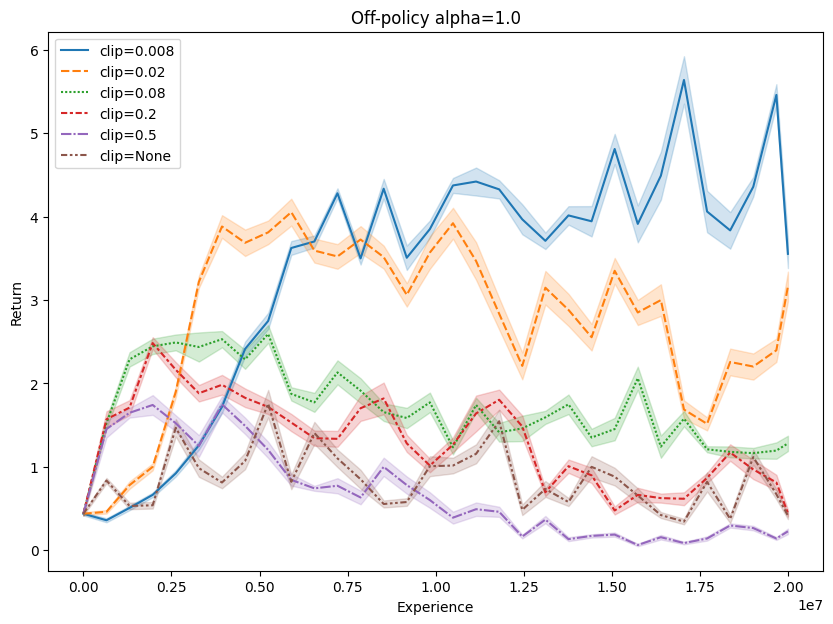

In [21]:
alphas = [0.9, 0.95, 1.0]
clips = [0.008, 0.02, 0.08, 0.2, 0.5, 1e6]

returns = plot_returns("Breakout-MinAtar", alphas, clips)

## 4. CartPole

(8, 4, 6, 14)


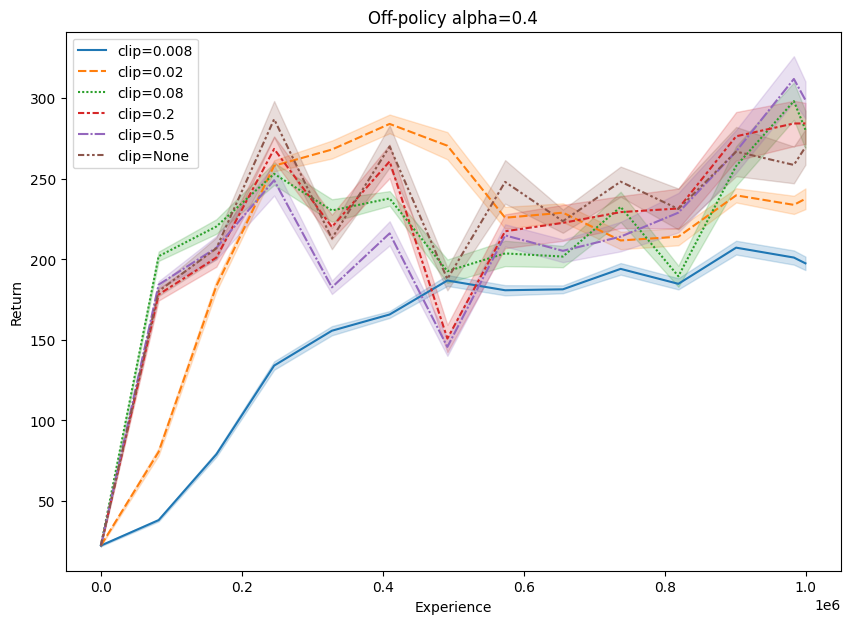

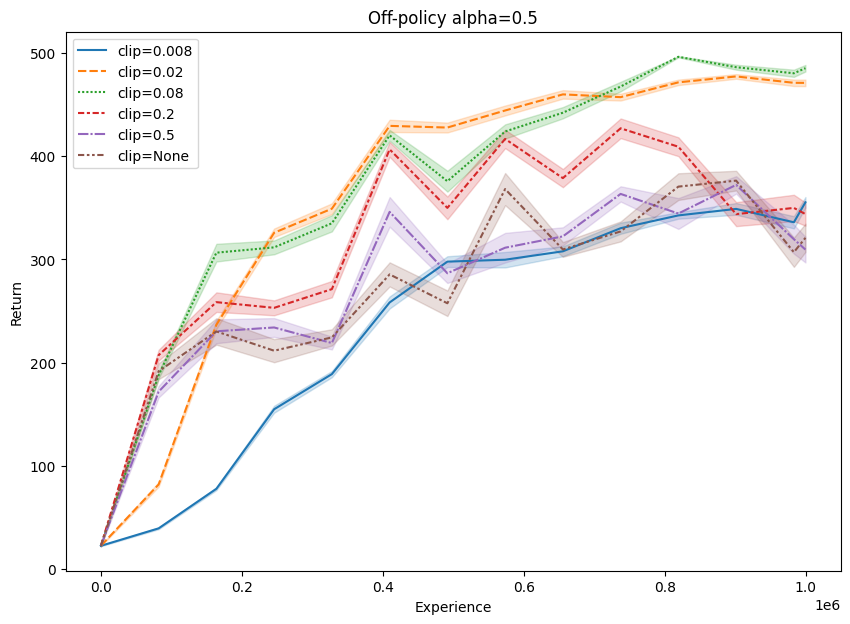

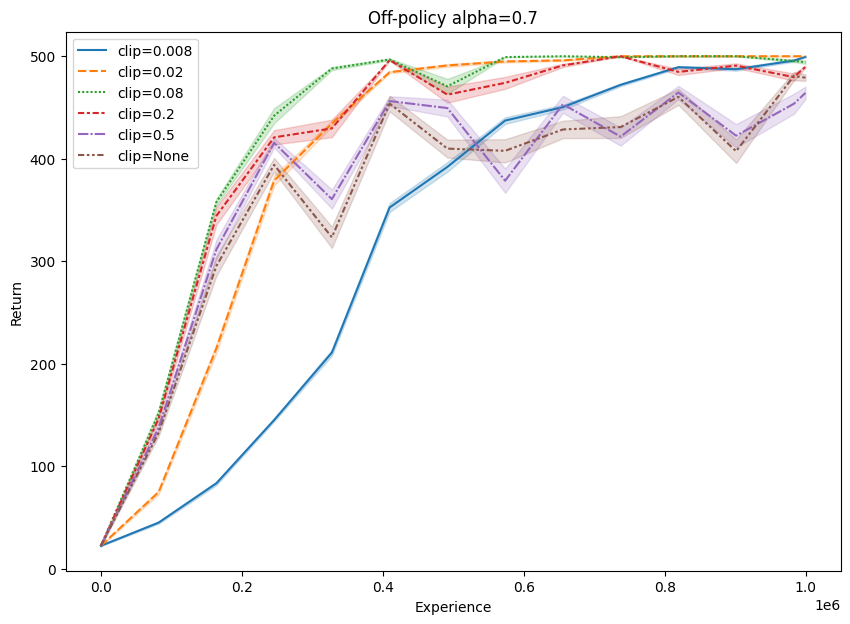

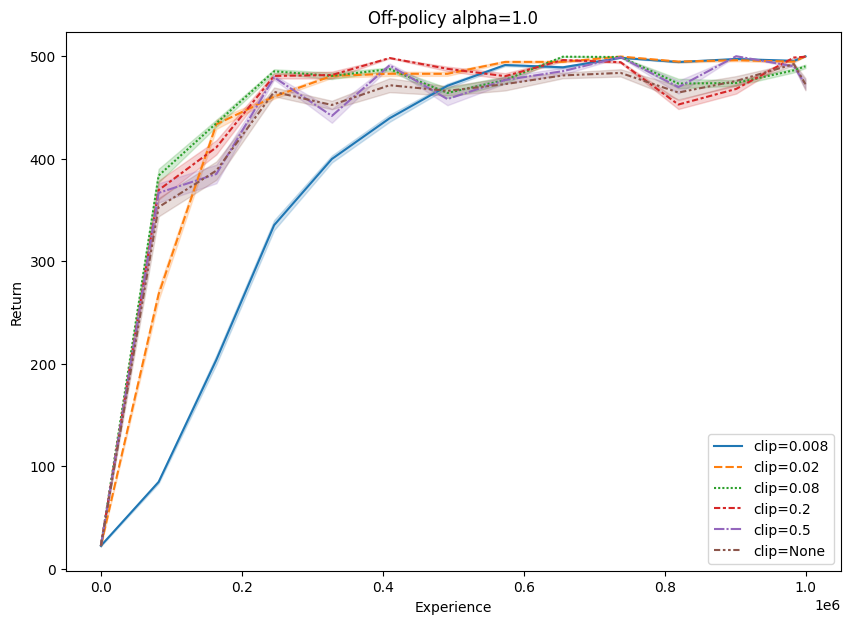

In [22]:
alphas = [0.4, 0.5, 0.7, 1.0]
clips = [0.008, 0.02, 0.08, 0.2, 0.5, 1e6]

returns = plot_returns("CartPole-v1", alphas, clips)

In [6]:
np.mean(returns[:, 1, 2, :], axis=0)

array([ 21.703125 , 157.765625 , 167.703125 , 207.703125 , 195.6015625,
       318.5859375, 495.7890625, 470.625    , 487.4453125, 489.4296875,
       497.8828125, 496.46875  , 499.296875 , 496.765625 , 496.84375  ,
       497.8203125])

## 5. Freeway

Doesn't learn anything.

## 6. MountainCar

## 7. SpaceInvaders